<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/Patrones/Practicas/B_Spline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

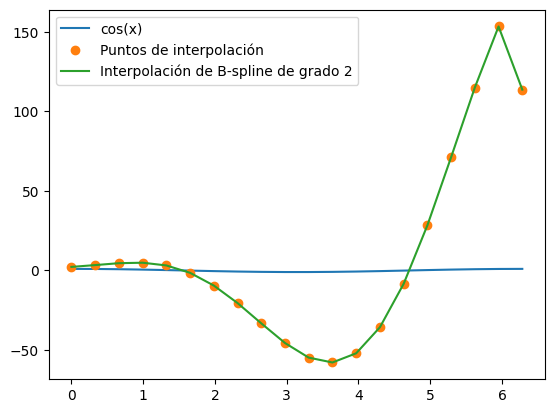

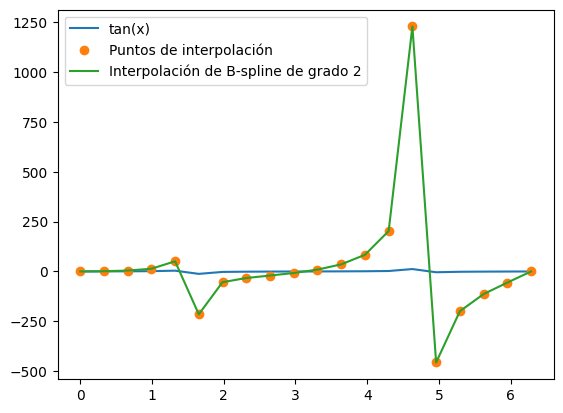

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n - 1)

def bspline_interpolation(x, y, k):
    """
    Realiza una interpolación polinómica de B-spline de grado k.

    Args:
        x: Los puntos de interpolación.
        y: Los valores de la función a interpolar en los puntos de interpolación.
        k: El grado de los polinomios B-spline.

    Returns:
        El polinomio de interpolación.
    """

    n = len(x)
    t = np.linspace(0, x[-1], n + 1)

    # Calculamos los polinomios de Bernstein de grado k
    b = np.zeros((n + 1, k + 1))
    for i in range(n + 1):
        for j in range(k + 1):
            b[i, j] = (
                factorial(j) * t[i] ** j * (1 - t[i]) ** (k - j)
            ) / factorial(k - j)

    # Calculamos los polinomios B-spline de grado k
    n = len(x)
    s = np.zeros(n)
    for i in range(n):
        s[i] = np.sum(np.ravel(b[i:i+k+1, :]), axis=None) * y[i]

    return s

# Generamos los puntos de interpolación
x = np.linspace(0, 2 * np.pi, 20)
y_cos = np.cos(x)
y_tan = np.tan(x)

# Realizamos la interpolación
s_cos = bspline_interpolation(x, y_cos, 2)
s_tan = bspline_interpolation(x, y_tan, 2)

# Grafica la interpolación de cos(x)
plt.plot(x, y_cos, label='cos(x)')
# Grafica los puntos de interpolación
plt.plot(x, s_cos, 'o', label='Puntos de interpolación')
# Grafica la curva de interpolación
plt.plot(x, s_cos, label='Interpolación de B-spline de grado 2')
plt.legend()
plt.show()

# Grafica la interpolación de tan(x)
plt.plot(x, y_tan, label='tan(x)')
# Grafica los puntos de interpolación
plt.plot(x, s_tan, 'o', label='Puntos de interpolación')
# Grafica la curva de interpolación
plt.plot(x, s_tan, label='Interpolación de B-spline de grado 2')
plt.legend()
plt.show()